<a href="https://colab.research.google.com/github/sahoopuspanjali/PracticalMachineLearning/blob/master/HW2_Conv(OriginalAlexNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt

Import Cifar10 dataset and split it into Test and train dataset

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


Display the data

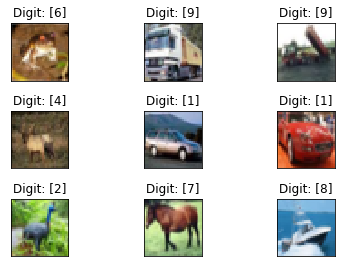

In [0]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title('Digit: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
X_train.shape

(50000, 32, 32, 3)

Configuring the AlexNet model but with less kernels and neurons

In [0]:
inputs = keras.Input(shape=(32,32,3))
# First convolutional layer
c1 = keras.layers.Conv2D(filters = 10, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(inputs)
s2 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(c1)

# Second convolutional layer
c3 = keras.layers.Conv2D(filters = 20, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(s2)
s4 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(c3)

# Third convolutional layer
c5 = keras.layers.Conv2D(filters = 30, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(s4)

# Fourth convolutional layer
c6 = keras.layers.Conv2D(filters = 30, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(c5)

# Fifth convolutional layer
c7 = keras.layers.Conv2D(filters = 20, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(c6)
s8 = keras.layers.MaxPooling2D(pool_size = 2, strides = 2)(c7)

# Flatten and fullly connected layers
f9 = keras.layers.Flatten()(s8)
f10 = keras.layers.Dense(units = 64, activation = 'relu')(f9)
f11 = keras.layers.Dense(units = 64, activation = 'relu')(f10)
outputs = keras.layers.Dense(units = 10, activation = 'softmax')(f11)

In [0]:
func_model = keras.Model(inputs,outputs)
func_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [0]:
h = func_model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 49s 1ms/sample - loss: 1.7578 - accuracy: 0.3672 - val_loss: 1.5417 - val_accuracy: 0.4328
Epoch 2/30
40000/40000 [==============================] - 48s 1ms/sample - loss: 1.4579 - accuracy: 0.4723 - val_loss: 1.4137 - val_accuracy: 0.4896
Epoch 3/30
40000/40000 [==============================] - 49s 1ms/sample - loss: 1.3401 - accuracy: 0.5185 - val_loss: 1.3197 - val_accuracy: 0.5256
Epoch 4/30
40000/40000 [==============================] - 48s 1ms/sample - loss: 1.2550 - accuracy: 0.5513 - val_loss: 1.2413 - val_accuracy: 0.5589
Epoch 5/30
40000/40000 [==============================] - 48s 1ms/sample - loss: 1.1913 - accuracy: 0.5748 - val_loss: 1.2420 - val_accuracy: 0.5578
Epoch 6/30
40000/40000 [==============================] - 48s 1ms/sample - loss: 1.1363 - accuracy: 0.5985 - val_loss: 1.2412 - val_accuracy: 0.5623
Epoch 7/30
40000/40000 [==============================] 

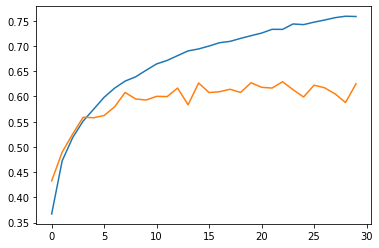

In [0]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.show()